*Last edit by DLao - 2019*

![](https://oec2solutions.com/wp-content/uploads/2016/12/assglb-700x580.png)


In [1]:
!pip install pandas_profiling

  Using cached pandas_profiling-2.8.0-py2.py3-none-any.whl (259 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
  Using cached matplotlib-3.2.1-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)


In [25]:
#필요한 모듈 불러오기 

import pandas as pd
import numpy as np


import pandas_profiling as pp

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from sklearn.metrics import confusion_matrix
%matplotlib inline


import scipy as sp
import seaborn as sns
from pandas import Series, DataFrame

import platform
sns.set(style='whitegrid', palette='muted')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel # 중요한 피쳐를 선택
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
import imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
import missingno as msno


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/TJ/Downloads/W-master/W-master/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
cols = ['type']
df[cols] = df[cols].apply(lambda x: x.astype('category').cat.codes)
df

,type,posts
0,8,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,3,'I'm finding the lack of me in these posts ver...
2,11,'Good one _____ https://www.youtube.com/wat...
3,10,"'Dear INTP, I enjoyed our conversation the o..."
4,2,'You're fired.|||That's another silly misconce...
...,...,...
8670,13,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,1,'So...if this thread already exists someplace ...
8672,11,'So many questions when i do these things. I ...
8673,9,'I am very conflicted right now when it comes ...


In [5]:
def var_row(row):
    l = []
    for i in row.split('.'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,type,posts,words_per_comment,variance_of_word_counts
0,8,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,45.623216
1,3,'I'm finding the lack of me in these posts ver...,23.40,48.953893
2,11,'Good one _____ https://www.youtube.com/wat...,16.72,104.227732
3,10,"'Dear INTP, I enjoyed our conversation the o...",21.28,74.339464
4,2,'You're fired.|||That's another silly misconce...,19.34,67.163435


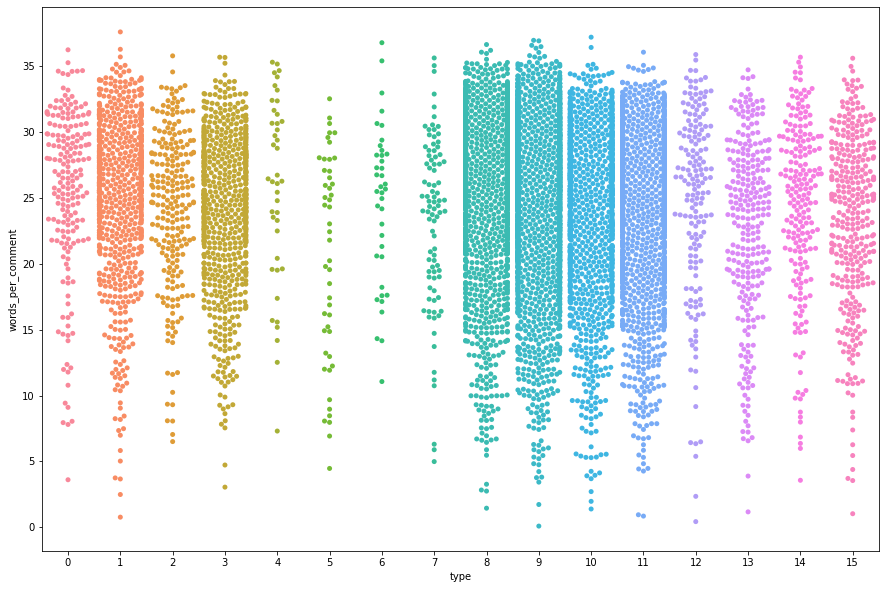

In [6]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

In [7]:
df.groupby('type').agg({'type':'count'})


,type
type,
0,190
1,675
2,231
3,685
4,42
5,48
6,39
7,89
8,1470


In [8]:
df_2 = df[~df['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
df_2['qm_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)
df_2.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,qm_per_comment
0,8,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,45.623216,0.48,0.36
1,3,'I'm finding the lack of me in these posts ver...,23.40,48.953893,0.20,0.10
2,11,'Good one _____ https://www.youtube.com/wat...,16.72,104.227732,0.10,0.24
3,10,"'Dear INTP, I enjoyed our conversation the o...",21.28,74.339464,0.04,0.22
4,2,'You're fired.|||That's another silly misconce...,19.34,67.163435,0.12,0.20


In [9]:
print(df_2.groupby('type').agg({'http_per_comment': 'mean'}))
print(df_2.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
0             0.053263
1             0.050459
2             0.053160
3             0.048263
4             0.027143
5             0.055417
6             0.052821
7             0.064719
8             0.065878
9             0.075426
10            0.063593
11            0.070767
12            0.070602
13            0.088339
14            0.061171
15            0.081009
      qm_per_comment
type                
0           0.213053
1           0.227259
2           0.240000
3           0.220964
4           0.176190
5           0.237083
6           0.209744
7           0.245843
8           0.208966
9           0.202533
10          0.214849
11          0.221580
12          0.200964
13          0.216384
14          0.214927
15          0.221602


<Figure size 1080x720 with 0 Axes>

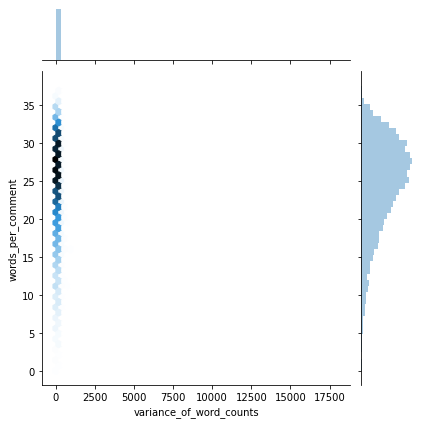

In [10]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_2, kind="hex")

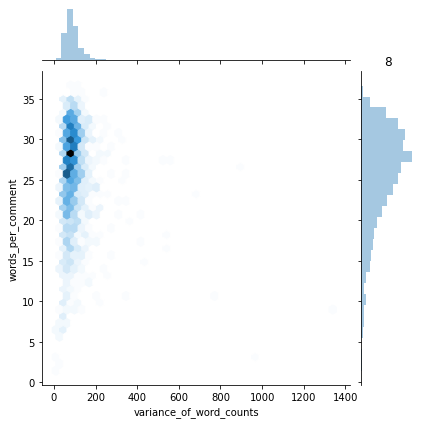

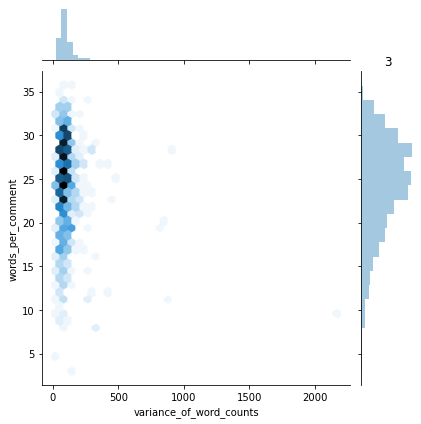

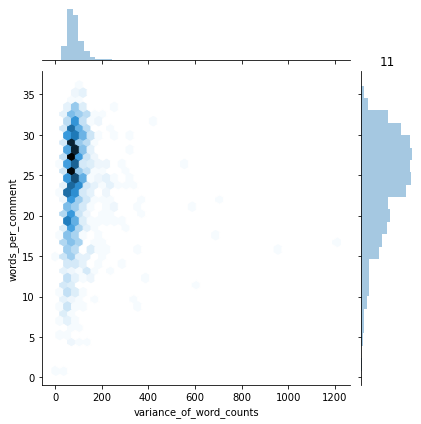

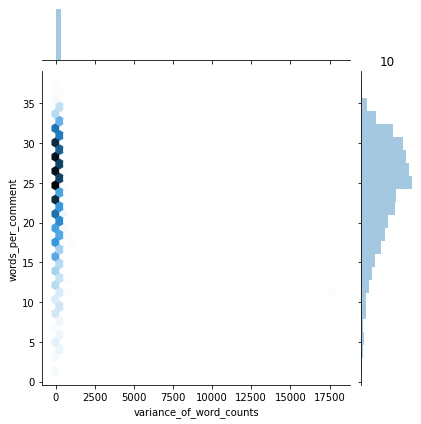

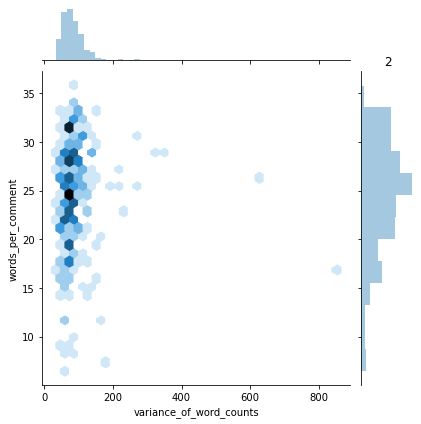

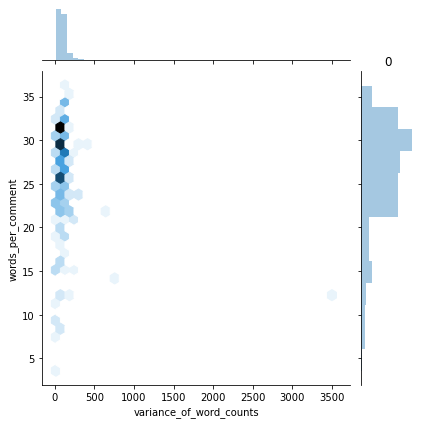

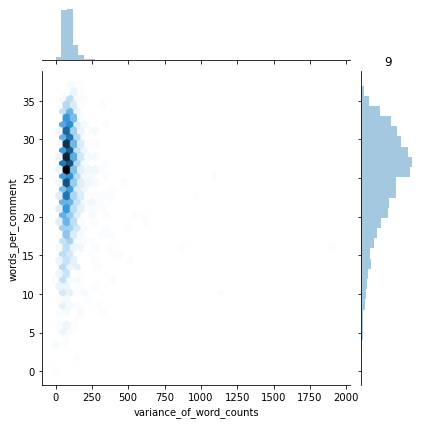

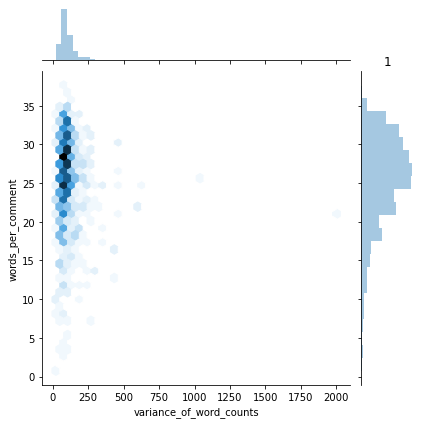

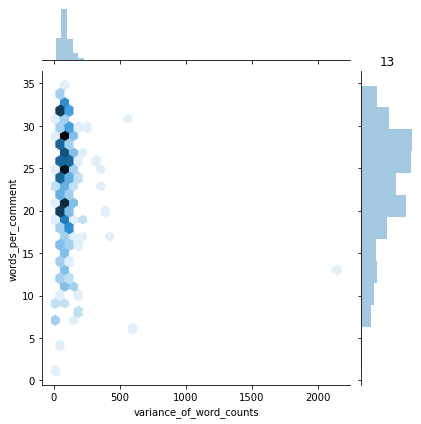

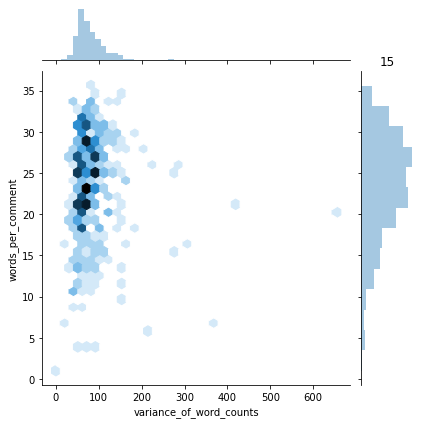

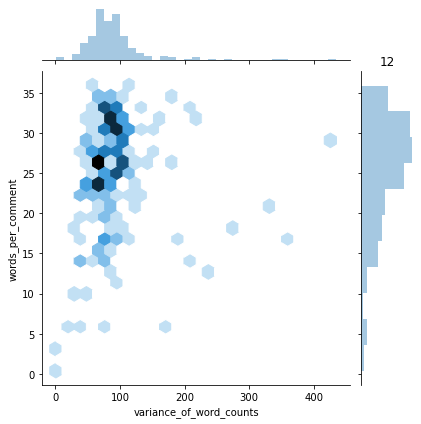

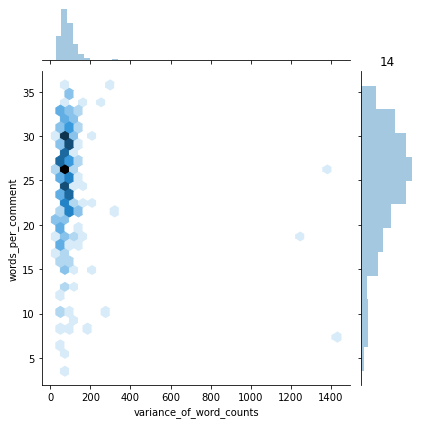

In [11]:
def plot_jointplot(mbti_type, axs, titles):
    df_3 = df_2[df_2['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex", ax = axs, title = titles)
    
i = df_2['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_3 = df_2[df_2['type'] == i[k]]
        sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex")
        plt.title(i[k])
        k+=1
    


In [12]:

from sklearn.model_selection import train_test_split

In [30]:
df['posts']=df['posts'].astype('category')
df['posts']=df['posts'].cat.codes
df['posts'].value_counts()

2047    1
5432    1
1306    1
3355    1
5408    1
       ..
6758    1
4711    1
2668    1
621     1
0       1
Name: posts, Length: 8675, dtype: int64

In [31]:
mdx=df.drop('type',axis=1)
dfy=df['type']



X_train,X_test,y_train,y_test = train_test_split(mdx,dfy,test_size=.25,random_state=0)

In [32]:

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6506, 3) (2169, 3) (6506,) (2169,)


In [33]:
!pip install lightgbm

In [34]:
import lightgbm as gbm 

In [35]:
!pip install imblearn

In [36]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
svm = SVC(random_state=0,C=100)
svm.fit(X_train, y_train)

display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.21441746080541038

0.2028584601198709

In [43]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.2131878266215801

0.20101429230059936

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

0.21395634798647403

0.2028584601198709

In [46]:
clf=KNeighborsClassifier(n_neighbors=200)
clf.fit(X_train,y_train).score(X_test, y_test)

display(clf.score(X_train, y_train))
display(clf.score(X_test, y_test))

0.22763602828158622

0.19640387275242047

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train).score(X_test, y_test)

display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

1.0

0.13600737667127707

In [48]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train,y_train).score(X_test, y_test)

display(gboost.score(X_train, y_train))
display(gboost.score(X_test, y_test))

0.46480172148785737

0.18026740433379437

In [49]:
voting = VotingClassifier(
    estimators = [('svc', svm), ('mlp', mlp), ('lr', lr), ('clf', clf),('tree', tree),('gboost', gboost)],
    voting = 'hard')


for clf in (svm, mlp, lr, clf, tree, gboost, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.2028584601198709
MLPClassifier 0.11387736284001844
LogisticRegression 0.2028584601198709
KNeighborsClassifier 0.19640387275242047
DecisionTreeClassifier 0.1267865375749193
GradientBoostingClassifier 0.1798063623789765
VotingClassifier 0.1991701244813278


In [ ]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(
    grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))


## 명동 파일 가져와서 확인하기

In [ ]:
md = pd.read_excel('C:/Users/TJ/Downloads/W-master/W-master/명동.xlsx')
md.head()

In [ ]:
md=md.drop('Unnamed: 0',axis=1)

In [ ]:
md

In [ ]:
md.columns=['score','posts']

In [ ]:
def var_row(row):
    l = []
    for i in row.split('.'):
        l.append(len(i.split()))
    return np.var(l)

md['words_per_comment'] = md['posts'].apply(lambda x: len(x.split())/50)
md['variance_of_word_counts'] = md['posts'].apply(lambda x: var_row(x))
md.head(10)